In [22]:
o2=vector([0,0])
o3=vector([0,0,0])
def face(a,b,col,e) : return polygon([o3,a,a+b,b],color=col,alpha=e)
def face2(o,a,b,col,e) : return polygon([o,o+a,o+a+b,o+b],color=col,alpha=e)
def volume(a,b,c,col) : 
    return face(b,c,col,0.1)+ face2(a,b,c,col,0.1)+face(a,b,col,0.2)+face2(c,a,b,col,0.2)+face(a,c,col,0.3)+face2(b,a,c,col,0.3) 
def vecplot(a,a_str, **kwargs):
    pos= 1.05*a
    if (a.length() == 2):
        txt=text(a_str,pos, **kwargs)
    else:
        txt=text3d(a_str,pos,fontsize=20, **kwargs)
    return plot(a, thickness=5,**kwargs)+ txt

def vecsomme(c1,c2):
    if (c1.length() == 2):
        return line2d([c1,c1+c2], color='black', linestyle='--')+line2d([c2,c1+c2], color='black', linestyle='--')
    else:
        return line3d([c1,c1+c2], color='black', linestyle='--')+line3d([c2,c1+c2], color='black', linestyle='--')

e0=vector(QQ,3,[1,0,0])
e1=vector(QQ,3,[0,1,0])
e2=vector(QQ,3,[0,0,1])
repere3d=vecplot(e0,'x',color="orange")+vecplot(e1,'y',color="orange")+vecplot(e2,'z',color="orange")

# Une approche géométrique de l'algèbre linéaire

## systèmes d'équations linéaires (en deux dimensions)

Résoudre le système d'équation $\begin{cases} 2x-y=0 \\-x+2y=3\ \end{cases}$

In [23]:
var('x y')
eq1= 2*x-y
eq2= -x+2*y

res=solve([eq1==0,eq2==3],[x,y])
show(res)
S=(res[0][0].rhs(), res[0][1].rhs())


[[x == 1, y == 2]]

On va considérer ce problème de manière graphique avec:
- une approche par ligne
- une approche par colonne

en utilisant la matrice associée à ces équations.

In [3]:
A=matrix(2,2,[2,-1,-1,2])
v=matrix(2,1,[x,y])
b=matrix(2,1,[0,3])
show(A,"*",v,"=",b )

[ 2 -1]
[-1  2] '*' [x]
[y] '=' [0]
[3]

### approche par les lignes de la matrice
- On considère chaque équation de manière indépendante et on cherche l'ensemble de leurs solutions.
- On prend l'intersection des solutions (en dimension 2 c'est l'intersection de 2 droites).

'rappel des équations: \t' 2*x - y == 0 ' et ' -x + 2*y == 3

'solution équation 1:' x |--> 2*x

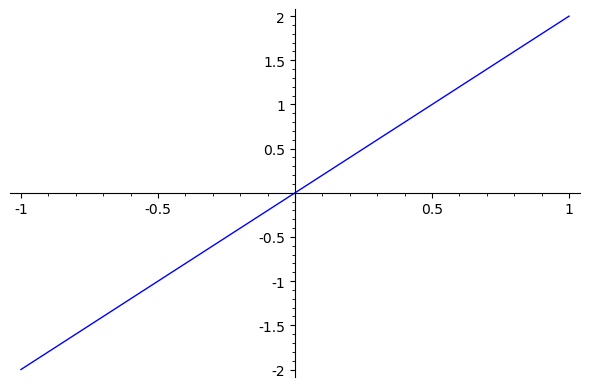

In [4]:
Av=A*v
f1(x)=solve(Av[0,0]==b[0,0],y)[0].rhs()
f2(x)=solve(Av[1,0]==b[1,0],y)[0].rhs()
show("rappel des équations: \t",eq1==0," et ", eq2==3)
show("solution équation 1:",f1)
show(plot(f1))

'rappel des équations: \t' 2*x - y == 0 ' et ' -x + 2*y == 3

'solution équation 2:' x |--> 1/2*x + 3/2

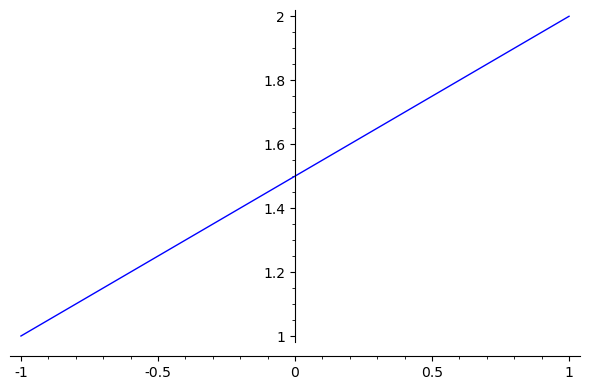

In [5]:
show("rappel des équations: \t",eq1==0," et ", eq2==3)
show("solution équation 2:",f2)
show(plot(f2))

'rappel des équations: \t' 2*x - y == 0 ' et ' -x + 2*y == 3

'intersection des solutions: ' (1, 2)

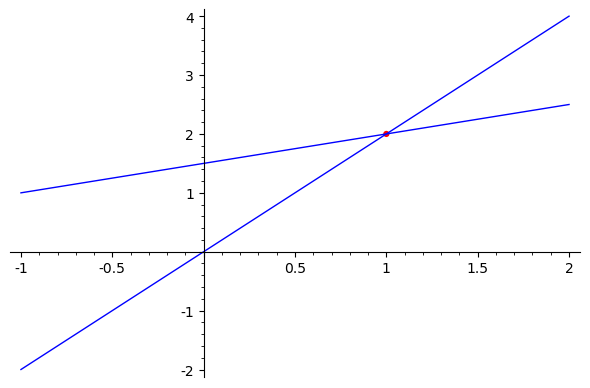

In [6]:
show("rappel des équations: \t",eq1==0," et ", eq2==3)
show("intersection des solutions: ",S)
show(plot(f1,-1,2)+plot(f2,-1,2)+point(S,color="red",size=20))


### approche par les colonnes
- On considère les colonnes de la matrice $A$
- On cherche une combinaison linéaire de ses colonnes qui donne le vecteur $b$

In [7]:
c0,c1=A.column(0),A.column(1)
show(A,"*",v,"=",b," =====>  \t", "x * ",A[:,0]," + y * ",A[:,1], "=", b)

[ 2 -1]
[-1  2] '*' [x]
[y] '=' [0]
[3] ' =====>  \t' 'x * ' [ 2]
[-1] ' + y * ' [-1]
[ 2] '=' [0]
[3]

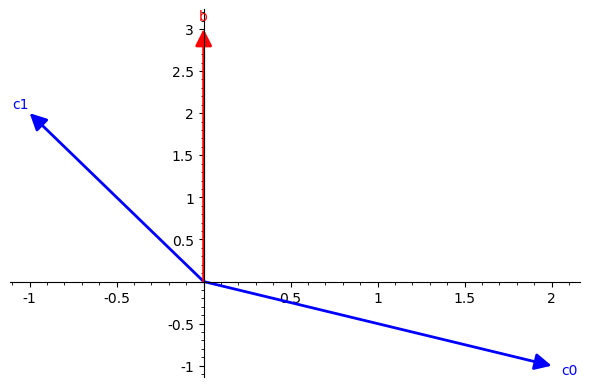

In [8]:
base=vecplot(c0,'c0')+vecplot(c1,'c1')+vecplot(b.column(0),'b',color="red")
show(base)

**Questions**
-  Comment sait-on qu'il existe une solution ?
-  Quelles conditions sur les coefficients de la solution ?

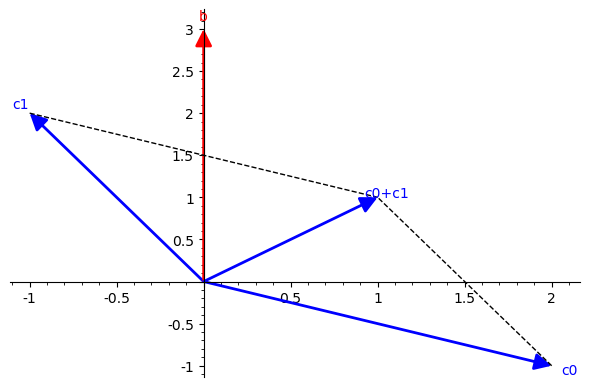

In [9]:
show(base+vecplot(c0+c1,'c0+c1')+vecsomme(c0,c1))

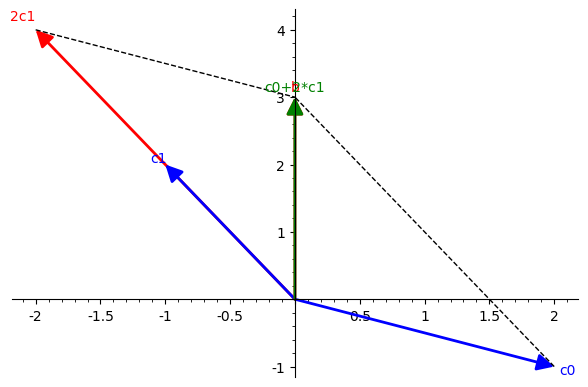

In [10]:
show(vecplot(2*c1,"2c1",color="red")+base+vecplot(c0+2*c1,'c0+2*c1',color="green")+vecsomme(c0,2*c1))

**Remarque:**
- L'exemple précédent était trompeur car la solution ne contenait que des entiers.
- L'exemple suivant illustre la nécessité de considérer les équations dans un corps !!! 

[ 3 -1]
[-1  2] '*' [x]
[y] '=' [0]
[3] ' =====>  \t' 'x * ' [ 3]
[-1] ' + y * ' [-1]
[ 2] '=' [0]
[3]

[x]
[y] '=' [3/5]
[9/5]

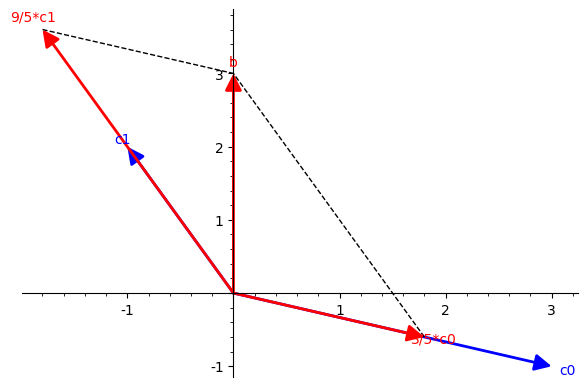

In [11]:
A=matrix(2,2,[3,-1,-1,2])
v=matrix(2,1,[x,y])
b=matrix(2,1,[0,3])
c0,c1=A.column(0),A.column(1)
base=vecplot(c0,'c0')+vecplot(c1,'c1')+vecplot(b.column(0),'b',color="red")
show(A,"*",v,"=",b," =====>  \t", "x * ",A[:,0]," + y * ",A[:,1], "=", b)
sol=A^(-1)*b
show(v,"=",sol)

base+=vecplot(sol[0,0]*c0,str(sol[0,0])+"*c0",color="red")+ vecplot(sol[1,0]*c1, str(sol[1,0])+"*c1",color="red")
show(base+vecsomme(sol[0,0]*c0,sol[1,0]*c1))

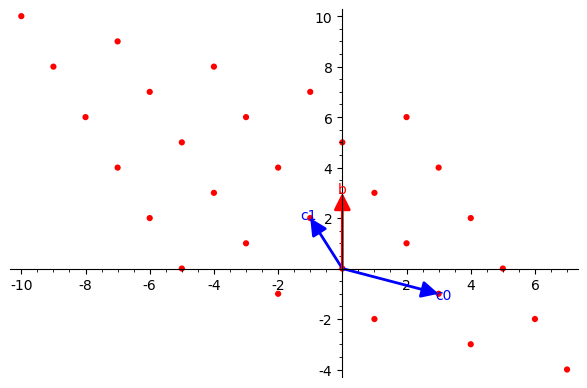

In [12]:

L=[(i*c0+j*c1) for i in range(-2,3) for j in range(-1,5)]
base=vecplot(c0,'c0')+vecplot(c1,'c1')+vecplot(b.column(0),'b',color="red")
show(base + point(L,size=20,color="red"))

##  systèmes d'équations linéaires (en trois dimensions)


Résoudre le système d'équation $\begin{cases} 3x-y-z=0 \\-x+2y+7z=3\\ x+y+2z=3 \end{cases}$

In [13]:
var("x y z")
A=matrix(QQ,3,3,[[3,-1,-1],[-1,2,7],[1,1,2]])
v=matrix(3,1,[x,y,z])
b=matrix(QQ,3,1,[0,3,3])
show(A,"*",v,"=",b)

[ 3 -1 -1]
[-1  2  7]
[ 1  1  2] '*' [x]
[y]
[z] '=' [0]
[3]
[3]

### approche par les lignes de la matrice
**Remarques:** cette fois ci c'est l'intersection de 3 plans

In [14]:
eq=A*v
eq,v

eq0= eq[0][0]==b[0,0]
eq1= eq[1][0]==b[1,0]
eq2= eq[2][0]==b[2,0]

show("eq0 ->\t ",eq0)
show("eq1 ->\t ",eq1)
show("eq2 ->\t ",eq2)

'eq0 ->\t ' 3*x - y - z == 0

'eq1 ->\t ' -x + 2*y + 7*z == 3

'eq2 ->\t ' x + y + 2*z == 3

In [15]:
rxyz=[-15,15]

P1=implicit_plot3d(eq0, rxyz,rxyz, rxyz ,color="blue")
P2=implicit_plot3d(eq1, rxyz,rxyz, rxyz ,color="red")
P3=implicit_plot3d(eq2, rxyz,rxyz, rxyz ,color="green")
sol=A^(-1)*b
show("solution=",sol)
Ps=point3d(sol.coefficients(),size=650, color="black")
show(Ps+P1+P2+P3)


'solution=' [ 4/5]
[13/5]
[-1/5]

Graphics3d Object

### Approche par les colonnes de la matrice
On cherche une combinaison linéaire des colonnes de la matrice $A$ qui donne le vecteur $b$

In [16]:
show(A,"*",matrix(3,1,[x,y,z]),"=",b," =====> \t x * ",A[:,0]," + y * ",A[:,1]," + z * ",A[:,2]," = ",b)

[ 3 -1 -1]
[-1  2  7]
[ 1  1  2] '*' [x]
[y]
[z] '=' [0]
[3]
[3] ' =====> \t x * ' [ 3]
[-1]
[ 1] ' + y * ' [-1]
[ 2]
[ 1] ' + z * ' [-1]
[ 7]
[ 2] ' = ' [0]
[3]
[3]

In [17]:
base=vecplot(A.column(0),'c0')+vecplot(A.column(1),'c1')+vecplot(A.column(2),'c2')+vecplot(b.column(0),'b',color="red")
show(base)

Graphics3d Object

**Questions**
-  Comment sait-on qu'il existe une solution ?

In [18]:

v0=A.column(0)*sol[0,0]
v1=A.column(1)*sol[1,0]
v2=A.column(2)*sol[2,0]
pv12=vecplot(v1+v2,"",color="orange")
pv1=vecplot(v1,"",color="green")
pv2=vecplot(v2,"",color="green")
pv0=vecplot(v0,"",color="orange")

show(base+pv0+pv1+pv12+pv2+vecsomme(v1+v2,v0)+vecsomme(v1,v2))
show("v0=",matrix(3,1,v0),"; v1+v2=",matrix(3,1,v1+v2),"; b=",b)

Graphics3d Object

'v0=' [12/5]
[-4/5]
[ 4/5] '; v1+v2=' [-12/5]
[ 19/5]
[ 11/5] '; b=' [0]
[3]
[3]

## Calcul du determinant en 2D = calcul aire 

**Exemple:**
calcul du déterminant de la matrice $M=\begin{pmatrix} 1& 2 \\ 3 & 1\end{pmatrix}$

**ATTENTION** cette fois ci, on récupère les vecteur lignes associés à M:
- $l_0 = [1, 2]$
- $l_1 = [3,1] $

'M=' [1 2]
[3 1]

'l0=' (1, 2) ' l1=' (3, 1)

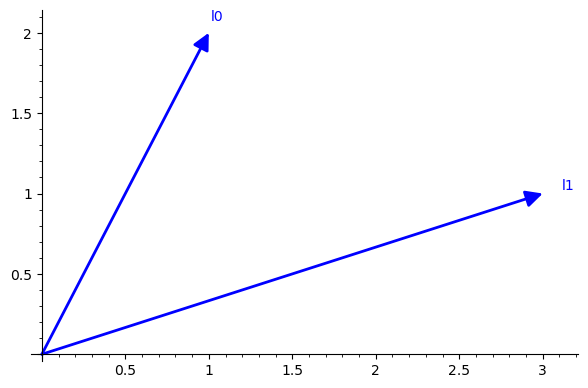

In [19]:
M=matrix(2,2,[1,2,3,1])
show("M=",M)
l0=M.row(0)
l1=M.row(1)

base= vecplot(l0,'l0')+vecplot(l1,'l1')
show("l0=",l0," l1=",l1)

show(base)

### Interprêtation graphique du déterminant
En 2 dimensions,
- la valeur absolue du déterminant correspond à l'aire du parallélogramme formé par les 2 vecteurs.
- le signe est obtenu par l'orientation entre les 2 vecteurs (horaire = -1, anti-horaire= 1)

'l0=' (1, 2) ', l1=' (3, 1)

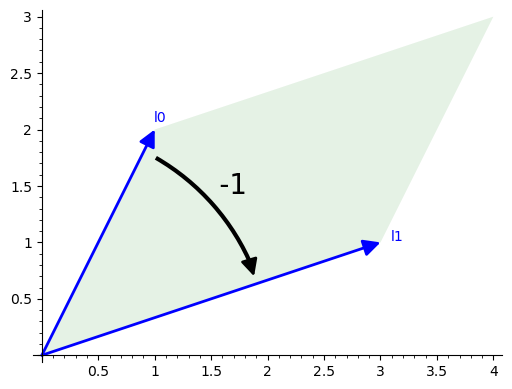

'det' [1 2]
[3 1] '=' -5

'l0=' (3, 1) ', l1=' (1, 2)

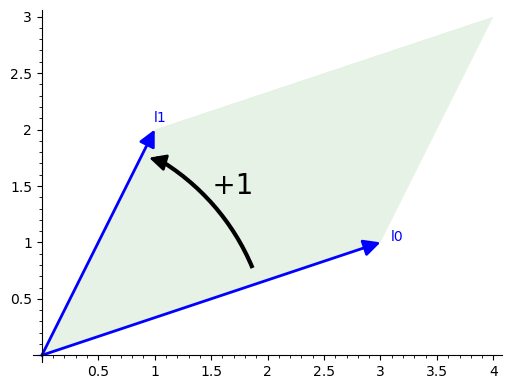

'det' [3 1]
[1 2] '=' 5

In [20]:
base+=face2(o2,l0,l1,"green",0.1)
orient=arc((0,0),2.02,sector=(pi/8,3*pi/9),color="black",thickness=3)
orient+= arrow((1.85,0.8),(1.88,0.7),color="black")+text("     -1",(1.5,1.5),color="black",fontsize=20)
show("l0=",l0,", l1=",l1)
show(base+orient)

M1= matrix([l0,l1])
show('det',M1,'=',M1.determinant())

show("l0=",l1,", l1=",l0)
M2= matrix([l1,l0])
base= vecplot(l1,'l0')+vecplot(l0,'l1')
base+=face2(o2,l0,l1,"green",0.1)
orient=arc((0,0),2.02,sector=(pi/8,3*pi/9),color="black",thickness=3)
orient+= arrow((1.05,1.72),(0.95,1.75),color="black")+text("     +1",(1.5,1.5),color="black",fontsize=20)
show(base+orient)


show('det',M2,'=',M2.determinant())

### Preuve géométrique de la formule du déterminant

In [21]:
var('a b c d')
M=matrix(2,2,[1,2,3,3])
M1=matrix(2,2,[a,b,c,d])
show("M=",M1)
l0=M.row(0)
l1=M.row(1)
a,b,c,d=l0[0],l0[1],l1[0],l1[1]

o=vector(QQ,2,[0,0])
x0=vector(QQ,2,[a,0])
y0=vector(QQ,2,[0,b])
x1=vector(QQ,2,[c,0])
y1=vector(QQ,2,[0,d])
eps=0.15
base0= vecplot(l0,'') + line([o,y0],color="red",thickness=2) +line([y0,x0+y0],color="red",thickness=2) 

base1= vecplot(l1,'') + line([0,x1],color="red",thickness=2) +line([x1,x1+y1],color="red",thickness=2) 


texta= text('a',(a/2,b+eps),fontsize=10,color="red")+text('a',(c+a/2,d+eps),fontsize=10,color="red")
textb= text('b',(eps,b/2),fontsize=10,color="red")+text('b',(a+c+eps,d+b/2),fontsize=10,color="red")
textd= text('d',(c+eps,d/2),fontsize=10,color="red")+text('d',(a+eps,b+d/2),fontsize=10,color="red")
textc= text('c',(c/2,eps),fontsize=10,color="red")+text('c',(a+c/2,b+d+eps),fontsize=10,color="red")

ext0= line([x0+y0,x0+y0+y1],color="red",thickness=2)+line([x1+y1,x1+y1+x0],color="red",thickness=2)
ext0+= line([x0+x1,x0+x1+y0+y1],color="red",thickness=2)
ext0+= line([y0+y1,x0+x1+y0+y1],color="red",thickness=2)
base=base0+base1
texte=texta+textb+textc+textd
show(base+texte+face2(o2,l0,l1,"green",0.1)+ext0)

var('a b c d')
show('det',M1,'=',det(M1))

'M=' [a b]
[c d]

TypeError: 'sage.rings.integer.Integer' object is not iterable

### Quelques Propriétés du déterminant


#### Le déterminant d'une matrice ayant deux vecteurs colinéaires est nul



In [ ]:
M=matrix([l0,3*l0])

show("det",M,"=",M.determinant())
vecplot(3*l0,'3*l0')+vecplot(l0,'l0',color="red")


#### Le déterminant est une fonction linéaire par rapport à une ligne de  la matrice

$\det
\begin{pmatrix}
a_0 & a_1 \\
a_2+b_2 & a_3 + b_3\\
\end{pmatrix}
=
\det
\begin{pmatrix}
a_0 & a_1 \\
a_2 & a_3\\
\end{pmatrix}
+\det
\begin{pmatrix}
a_0 & a_1\\
b_2 & b_3\\
\end{pmatrix}
$

**ATTENTION:** cela ne veut pas dire $\det(A+B)=\det(A)+\det(B)$

In [ ]:

a=vector([1,2])
b=vector([4,0])
c=vector([0,2])
M1= matrix([a,b])
M2= matrix([a,c])
M3= matrix([a,b+c])

show("a=",a," b=",b," c=",c)
show("det",M1,"+ det" ,M2,"= det",M3)
base=vecplot(a,'a')+vecplot(b,'b',color='red')+vecplot(c,'c',color='red')+vecplot(b+c,'b+c',color='green')
base+=face2(o2,a,b,"red",0.1)+face2(o2,a,c,"red",0.1)+face2(o2,a,b+c,"green",0.1)
base+=line2d([b+c,b+c-a],color='black', linestyle='--')
base+=line2d([b+c,b],color='black', linestyle='--')
base+=line2d([c,a],color='black', linestyle='--')
show(base)

$\det
\begin{pmatrix}
a_0 & a_1 \\
\lambda a_2 & \lambda a_3 \\
\end{pmatrix}
=
\lambda
\det
\begin{pmatrix}
a_0 & a_1 \\
a_2 & a_3\\
\end{pmatrix}
$

In [ ]:
a=vector([1,2])
b=vector([4,0])
M1= matrix([a,3*b])
M2= matrix([a,b])
show("a=",a," b=",b," c=",c)
show("det",M1,"= 3* det" ,M2)
base=face2(o2,a,b,"red",0.2)+face2(b,a,b,"orange",0.1)+face2(0,a,3*b,"green",0.2)
base+=vecplot(a,'a')+vecplot(b,'b',color='red')+vecplot(3*b,'3b',color='green')

show(base)

#### Le déterminant est invariant si on ajoute à une ligne une combinaison linéaire des autres lignes

c'est une conséquence des 2 propriétés précédentes !!!

In [ ]:
sa=0.7
sb=0.4
a=vector([1,2])
b=vector([3,1])
c=a+sa*b
d=b+sb*a
base= vecplot(a,'a')+vecplot(b,'b')
base+=face2(o2,a,b,"blue",0.1)
lines=line2d([a,b*((a*b)/(b*b))],color='black', linestyle='--')+line2d([c,b*((c*b)/(b*b))],color='black', linestyle='--')
show(base+vecplot(c,'a=a+'+str(sa.n(10))+'b', color="red")+face2(o2,b,c,"red",0.1)+lines)

In [ ]:
lines=line2d([b,a*((a*b)/(a*a))],color='black', linestyle='--')+line2d([d,a*((a*d)/(a*a))],color='black', linestyle='--')
show(base+vecplot(d,'b=b+'+str(sb.n(10))+'a', color="orange")+face2(o2,a,d,"orange",0.1)+lines)

**ATTENTION:** on ne peut pas faire les deux combinaison linéaire en même temps (on doit rester linéaire en une seule des lignes)

In [ ]:
show(base+
     vecplot(c,'a=a+'+str(sa.n(10))+'b',color="red")+
     vecplot(d,'b=b+'+str(sb.n(10))+'a',color="orange")+
     face2(o2,c,d,"orange",0.1))

#### Autres propriétés
- échanger deux lignes d'une matrice change le signe du déterminant
- la transposition de matrice ne change pas le déterminant
- le déterminant d'un produit de matrice $A \times B$ est égal à $\det(A)\times \det(B)$


### Comment trouver le déterminant
il faut faire des modifications des vecteurs pour qu'ils soient orthogonaux (perpendiculaires).
On va donc ajouter des combinaisons linéaires jusqu'a ce que les 2 vecteurs soient orthogonaux.


In [ ]:
@interact
def _(sa=slider(-3,3,0.25), sb = slider(-6,6,0.25)):
    o2=vector([0,0])
    sh=vector([0.1,0.1])
    a=vector([5,2])
    b=vector([2,4])
    c=a+sa*b
    d=b+sb*c
    base= vecplot(a,'a')+vecplot(b,'b')+face2(o2,a,b,"blue",0.1)
    show( base+vecplot(c,'a',color="orange")+vecplot(d,'b',color="orange")+face2(o2,c,d,"orange",0.1))
    show('det',matrix(2,2,[a,b]),' = det',matrix(QQ,2,2,[c,d]))

## Calcul du determinant en 3D = calcul volume 

En trois dimension, le déterminant d'une matrice correspond au volume du polyédre (prisme) engendré par les vecteurs composant la matrice.

In [ ]:
o3=(0,0,0)
s1,s2=1/2,2/10
v1=vector([3,0,0])
v2=vector([0,5,0])
v3=vector([0,0,2])
v4=v2+s1*v3
v5=v1+s1*v2+s2*v3
v6=v3+v5

show("v1=",v1)
show("v2=",v2)
show("v3=",v3)


M=matrix([v1,v2,v3])
show("matrice associée: ",M)

In [ ]:
show("det",M,"=",M.determinant())
show(repere3d+vecplot(v1,'v1')+vecplot(v2,'v2')+vecplot(v3,'v3')+volume(v1,v2,v3,"blue"),figsize=8)

In [ ]:
show('v2=v2+'+str(s1)+'*v3', '==> det',matrix(3,3,[v1,v2,v3]),'= det', matrix(3,3,[v1,v4,v3]))
show(repere3d+vecplot(v1,'v1')+vecplot(v4,'v4')+vecplot(v3,'v3',color="black")+ volume(v1,v4,v3,"orange")+volume(v1,v2,v3,"blue"))

In [ ]:
show('v1=v1+'+str(s1)+'*v2+'+str(s2)+'*v3',' ==> det',matrix(3,3,[v1,v2,v3]),'= det', matrix(3,3,[v1,v4,v3]), '= det', matrix(3,3,[v5,v4,v3]))
show(repere3d+vecplot(v3,'v3')+vecplot(v4,'v4',color="black")+vecplot(v5,'v5',color="black")+ volume(v5,v4,v3,"green")+ volume(v1,v4,v3,"orange"))



### Exercice: trouver le déterminant de la matrice suivante
$
M=
\begin{bmatrix}
3 & 2 & 1 \\
3 & 1 & 3 \\
3 & -1 & 2
\end{bmatrix}
$


In [ ]:
a=vector([3,2,1])
b=vector([3,1,3])
c=vector([3,-1,2])
M=matrix([a,b,c])
show("M=",M)
show(repere3d+vecplot(a,' L1')+vecplot(b,'L2')+vecplot(c,'L3')+volume(a,b,c,"blue"))

In [ ]:
old=volume(a,b,c,"orange")
print("a=",a,"\nb=",b,"\nc=",c)
s=QQ(input("b <- b + s * a ; donner une valeur pour s: "))
b=b+s*a
show(repere3d+vecplot(a,'a')+vecplot(b,'b')+vecplot(c,'c')+volume(a,b,c,"blue")+old)



In [ ]:
old=volume(a,b,c,"orange")
print("a=",a,"\nb=",b,"\nc=",c)
s=QQ(input("c <- c + s * a ; donner une valeur pour s: "))
c=c+s*a
show(repere3d+vecplot(a,'a')+vecplot(b,'b')+vecplot(c,'c')+volume(a,b,c,"blue")+old)



In [ ]:
old=volume(a,b,c,"orange")
print("a=",a,"\nb=",b,"\nc=",c)
s=QQ(input("c <- c + s * b ; donner une valeur pour s: "))
c=c+s*b
show(repere3d+vecplot(a,'a')+vecplot(b,'b')+vecplot(c,'c')+volume(a,b,c,"blue")+old)

In [ ]:
old=volume(a,b,c,"orange")
print("a=",a,"\nb=",b,"\nc=",c)
s=QQ(input("b <- b + s * c ; donner une valeur pour s: "))
b=b+s*c
show(repere3d+vecplot(a,'a')+vecplot(b,'b')+vecplot(c,'c')+volume(a,b,c,"blue")+old)

In [ ]:
old=volume(a,b,c,"orange")
print("a=",a,"\nb=",b,"\nc=",c)
s=QQ(input("a <- a + s * c ; donner une valeur pour s: "))
a=a+s*c
show(repere3d+vecplot(a,'a')+vecplot(b,'b')+vecplot(c,'c')+volume(a,b,c,"blue")+old)

In [ ]:
old=volume(a,b,c,"orange")
print("a=",a,"\nb=",b,"\nc=",c)
s=QQ(input("a <- a + s * b ; donner une valeur pour s: "))
a=a+s*b
show(repere3d+vecplot(a,'a')+vecplot(b,'b')+vecplot(c,'c')+volume(a,b,c,"blue")+old)

In [ ]:
print("a=",a,"\nb=",b,"\nc=",c)
show("determinant=a[0]*b[1]*c[2]=",a[0]*b[1]*c[2])
show("det",M,"=",det(M))

## Méthode d'élimination de Gauss

Le principe est celui développé dans le calcul du déterminant:

on ajoute à une ligne $l_i$ de la matrice un multiple d'une autre ligne $l_p$ de telle sorte que l'on
diminue la dimension de l'espace dans lequel vit la ligne $l_i$. Dit autrement, on essaie de mettre une entrée à  zéro dans la ligne $l_i$. On appelle cette modification une transformation élémentaire.

**Objectif:** appliquer une succesion de transformations élémentaires pour simplifier la structure de la matrice

### pour le déterminant

On veut simplifier la matrice pour qu'elle soit triangulaire inférieure
- dans ce cas, le déterminant est égal au produit des éléments diagonaux

In [ ]:
a=vector([3,2,1])
b=vector([3,1,3])
c=vector([3,-1,2])
M=matrix([a,b,c])
oldM=copy(M)
show("M=",M)

In [ ]:
M[1,:]-=M[0,:]
show(M)

In [ ]:
M[2,:]-=M[0,:]
show(M)

In [ ]:
M[2,:]-=3*M[1,:]
show(M)

In [ ]:
show('det',oldM,'=','det',M,'=',det(M))

**Questions:** 
- combien doit-on faire de transformations élémentaires pour transformer une matrice de dimension $n\times n$ en une matrice triangulaire
- quel est la complexité asymptotique pour transformer une matrice de dimension $n\times n$ en une matrice triangulaire 

**Algorithme:** Transformation triangulaire  
Entrée: une matrice A de taille $n\times n$  

`pour` i=0 à n  
>$L_p$ = i-ème ligne de la matrice  $A$  
>`pour` j=i+1 à n
>>$L_j$ = j-ème ligne de la matrice $A$  
>> $\alpha = - L_j[i] / L_p[i]$  
>>$L_j = L_j + \alpha L_p$

In [ ]:
def TriangularTransform(M):
    A=copy(M)
    n=A.nrows()
    for i in range(n-1):
        for j in range(i+1,n):
            a=-A[j,i]/A[i,i]
            A[j,:]+=a*A[i,:]
        show("step(",i,") -> ",A)
    return A

In [ ]:
a=vector(QQ,3,[3,2,1])
b=vector(QQ,3,[3,1,3])
c=vector(QQ,3,[3,-1,2])
M=matrix(QQ,3,3,[a,b,c])

show(TriangularTransform(M))

In [ ]:
n=8
M=MatrixSpace(QQ,n).random_element(density=1)
show(M)
A=TriangularTransform(M)
show(A)
show(det(M),"==",product(A[i,i] for i in range(n)))

#### cas du déterminant nul

Le déterminant est nul dans les cas suivants:
- la matrice n'est pas carrée
- il y a une dépendance linéaire entre les vecteurs qui composent la matrice (matrice non-inversible)

In [ ]:
n=3
M=MatrixSpace(QQ,n,n+1).random_element(density=1)
show(M)

In [ ]:
cols=[plot(M.column(i)) for i in range(M.ncols())]
show(sum(cols))

In [ ]:
n=2
M=MatrixSpace(QQ,n,n+1).random_element(density=1)
show(M)
M=M.stack(M.row(0)+M.row(1))
show(copy(M))

In [ ]:
rows=[plot(M.row(i)) for i in range(M.nrows())]
show(sum(rows))

#### cas des zéros sur la diagonale

La méthode d'élimination nécessite que tous les éléments diagonaux soient non-nuls.  

Que faire si cela n'est pas le cas, e.g. $M_{k,k} =0$  
Il suffit de trouver une ligne d'indice $j>k$ tel que $M_{j,k}\neq 0$ et d'échanger les deux lignes.
Attention, cet échange change le signe du déterminant.

**Remarque** si il n'existe pas de $j>k$ tel que $M_{j,k}\neq 0$, alors on sait que le déterminant est nul.

In [ ]:
def MyDeterminant(M):
    assert M.nrows()==M.ncols(), "non square matrix "
    A=copy(M)
    n=A.nrows()
    sign=1
    for i in range(n-1):
        for j in range(i+1,n):
            k=i
            while (k<n and A[k,i]==0): k+=1
            if (k==n): return 0
            if (k!=i): 
                print(f"swap {i} <-> {k}")
                sign*=-1
            A.swap_rows(i,k)
            a=-A[j,i]/A[i,i]
            A[j,:]+=a*A[i,:]
        show("step(",i,") -> ",A)
    return sign*prod(A[i,i] for i in range(n))

In [ ]:
MyDeterminant(M)

In [ ]:
n=6
M=MatrixSpace(QQ,n).random_element(density=1)
M[0,0]=0
show(M)
MyDeterminant(M), det(M)

### pour la résolution de système d'équations linéaires

de manière similaire au déterminant on va changer la structure du problème pour que cela soit facile.

#### un cas trivial pour la résolution de système linéaire

si la matrice est diagonale la résolution est immédiate.  
Il suffit de diviser les entrées du vecteur $b$ par les éléments diagonaux de la matrice.

In [ ]:
var("x y z")
A=matrix(QQ,3,3,[[3,0,0],[0,2,0],[0,0,2]])
v=matrix(3,1,[x,y,z])
b=matrix(QQ,3,1,[1,3,3])
show(A,"*",v,"=",b)

In [ ]:

base=vecplot(A.column(0),'c0')+vecplot(A.column(1),'c1')+vecplot(A.column(2),'c2')+vecplot(b.column(0),'b',color="red")
show(base+repere3d)

In [ ]:
sol=vector([b[i,0]/A[i,i] for i in range(3)])
show(sol)

#### un cas  facile pour la résolution de système linéaire

si la matrice est triangulaire, la résolution peut se faire en substituant les variables une à une.

In [ ]:
var("x y z")
A=matrix(QQ,3,3,[[3,2,-1],[0,2,2],[0,0,5]])
v=vector(SR,3,[x,y,z])
b=vector(QQ,3,[1,3,-2])
A0=copy(A)
b0=copy(b)
show(A,"*",matrix(3,1,v),"=",matrix(3,1,b))

On peut trivialement trouver la valeur de $z$

In [ ]:
n=A.ncols()-1
v[n]=b[n]/A[n,2]
z=v[n]

In [ ]:
show(A,"*",matrix(3,1,v),"=",matrix(3,1,b))

- On peut donc enlever la dernière ligne du système car $z$ est connu,
- et on se ramène à un système $2 \times 2$ en modifiant le vecteur $b$: on ajoute $z$ fois la dernière colonne de $A$ à $b$.

In [ ]:
show(matrix(3,1,A*v),"=",matrix(3,1,b))

In [ ]:
n=A.ncols()-1
for i in range(n) :
    b[i]-=A[i,n]*v[n]
A=copy(A[0:n,0:n])
v=copy(v[0:n])
b=copy(b[0:n])
show(A,"*",matrix(2,1,v),"=",matrix(2,1,b))

On peut trivialement trouver la valeur de $y$

In [ ]:
n=A.ncols()-1
v[n]=b[n]/A[n,n]
y=v[n]

In [ ]:
show(A,"*",matrix(2,1,v),"=",matrix(2,1,b))

- On peut donc enlever la dernière ligne du système car $y$ est connu
- et on se ramène à un système $1 \times 1$ en modifiant le vecteur $b$:  on ajoute $y$ fois la dernière colonne de $A$ à $b$.

In [ ]:
show(matrix(2,1,A*v),"=",matrix(2,1,b))

In [ ]:
n=A.ncols()-1
for i in range(n) :
    b[i]-=A[i,n]*v[n]
A=copy(A[0:n,0:n])
v=copy(v[0:n])
b=copy(b[0:n])
show(A,"*",v,"=",b)

In [ ]:
n=A.ncols()-1
v[n]=b[n]/A[n,n]
x=v[n]

In [ ]:
sol=vector(QQ,3,[x,y,z])
A0*sol==b0, sol

La méthode générale reprend ce principe pour calcul le vecteur $v$ tel que $Av=n$:   
`pour` i=n-1 à 0  
> $v_i = b_i /A_{i,i}$  
> $b = b - A_{*,i}v_i$  
    


In [ ]:
def remonteTriangulaire(A,b):
    b=copy(b)
    n=A.ncols()
    v=vector(SR,n,['x'+str(i) for i in range(n)])
    show(A,"*",matrix(n,1,v),"=",matrix(n,1,b))
    for i in range(n-1,-1,-1) :
        v[i]= b[i]/A[i,i]
        b-=A.column(i)*v[i]
        show(A,"*",matrix(n,1,v),"=",matrix(n,1,b))
    return v

In [ ]:
A=matrix(QQ,3,3,[[3,2,-1],[0,2,2],[0,0,5]])
b=vector(QQ,3,[1,3,-2])
sol=remonteTriangulaire(A,b)
show(A*sol==b,sol)

In [ ]:
n=6
A = Matrix(QQ, n, n, lambda i,j: QQ(i<=j)*QQ.random_element(100,100))
b=VectorSpace(QQ,n).random_element()
sol=remonteTriangulaire(A,b)
A*sol==b

#### le cas général (pas vraiment)
Pour résoudre un système $Ax=b$
- on doit rendre le système triangulaires, 
- puis on utilise la remontée triangulaire sur le nouveau système

Pour transformer un système linéaire $Ax=b$ en un système triangulaire il faut triangulariser la matrice $A$ et appliquer les mêmes transformations au vecteur $b$. 

- soit $ G \times A = T$ avec T une matrice triangulaire,
- le système devient $Tx= Gb$

**Remarque:** une façon simple pour ne pas calculer la matrice $G$ est d'ajouter le vecteur $b$ comme colonne supplémentaire de la matrice $A$.

In [ ]:
n=3
A=MatrixSpace(QQ,n).random_element()
b=VectorSpace(QQ,n).random_element()
show(A,matrix(3,1,b))
B=A.augment(b)
show("B=",B)

In [ ]:
Tb=TriangularTransform(B)
T=Tb[:,:-1]
Gb=Tb[:,-1]
show(T,Gb)
G=T*A^(-1)
show("G=",G)

In [ ]:
vector(Gb)==G*b  ,  G*A == T 

In [ ]:
def LinearSolve(A,b):
    n=A.ncols()
    Ab=matrix(A.base_ring(),n,n+1)
    Ab[:,:n]=copy(A)
    Ab[:,n]=copy(b)
    Ab=TriangularTransform(Ab)
    return remonteTriangulaire(Ab[:,:n],Ab.column(n))

In [ ]:
n=8
A=MatrixSpace(QQ,n).random_element()
b=VectorSpace(QQ,n).random_element()
show(A,matrix(n,1,b))

In [ ]:
x=LinearSolve(A,b)
show(A*x==b,x)